#                                -:Weather Data Analysis:-

In [1]:
# Importing required Librearies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset

data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


###  Exploratory Data Analysis

In [3]:
data.shape

(96453, 12)

In [4]:
data.index

RangeIndex(start=0, stop=96453, step=1)

In [5]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [8]:
# no of records on each Category in Precip Type Column

data["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [10]:
# Unique wind speed values in the data

data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [11]:
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [12]:
# First 30 Unique values in Wind Speed

data["Wind Speed (km/h)"].unique()[0:30]

array([14.1197, 14.2646,  3.9284, 14.1036, 11.0446, 13.9587, 12.3648,
       14.1519, 11.3183, 12.5258, 17.5651, 19.7869, 21.9443, 20.6885,
       15.3755, 10.4006, 14.4095, 11.1573,  8.5169,  7.6314,  7.3899,
        4.9266,  6.6493, 16.9855, 17.2109, 10.8192, 11.0768, 13.0088,
       11.1734, 12.8156])

In [17]:
# no of times the precip type is exactly rain

data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [18]:
data["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [19]:
data[data["Precip Type"]=="rain"].head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [20]:
data.groupby("Precip Type").get_group("rain").head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [22]:
# no of times the wind speed is Less then 10km/h

data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [23]:
data[data["Wind Speed (km/h)"]<10].head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
18,2006-04-01 18:00:00.000 +0200,Mostly Cloudy,rain,14.255556,14.255556,0.69,8.5169,163.0,11.2056,0.0,1015.82,Partly cloudy throughout the day.
19,2006-04-01 19:00:00.000 +0200,Mostly Cloudy,rain,13.144444,13.144444,0.70,7.6314,139.0,11.2056,0.0,1015.83,Partly cloudy throughout the day.
20,2006-04-01 20:00:00.000 +0200,Mostly Cloudy,rain,11.550000,11.550000,0.77,7.3899,147.0,11.0285,0.0,1015.85,Partly cloudy throughout the day.
21,2006-04-01 21:00:00.000 +0200,Mostly Cloudy,rain,11.183333,11.183333,0.76,4.9266,160.0,9.9820,0.0,1015.77,Partly cloudy throughout the day.


In [24]:
# mean of visibility column

data["Visibility (km)"].mean()

10.347324929237148

In [25]:
# standard deviation of pressure

data["Pressure (millibars)"].std()

116.96990568258147

In [26]:
# variance of humidity

data["Humidity"].var()

0.03820959171844407

In [27]:
# All instances when "summary" is dry

data[data["Summary"]=="Dry"].head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
12706,2007-07-20 10:00:00.000 +0200,Dry,rain,34.055556,33.005556,0.28,13.8138,179.0,9.9820,0.0,1014.03,Partly cloudy starting in the afternoon contin...
12707,2007-07-20 11:00:00.000 +0200,Dry,rain,35.944444,34.927778,0.25,13.1054,168.0,10.3523,0.0,1013.94,Partly cloudy starting in the afternoon contin...
12714,2007-07-20 18:00:00.000 +0200,Dry,rain,37.894444,35.761111,0.16,9.6922,179.0,9.9820,0.0,1011.52,Partly cloudy starting in the afternoon contin...
12715,2007-07-20 19:00:00.000 +0200,Dry,rain,36.272222,34.772222,0.22,8.1144,170.0,9.9820,0.0,1011.54,Partly cloudy starting in the afternoon contin...
12754,2007-07-22 10:00:00.000 +0200,Dry,rain,34.955556,34.166667,0.28,14.4417,248.0,9.9820,0.0,1009.20,Partly cloudy starting in the afternoon.


In [28]:
data["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [29]:
# All the instances with windSpeed Grather then 24 AND Visibility Less then 10.

data[(data["Wind Speed (km/h)"]>24) & (data["Visibility (km)"]<10)]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
37,2006-04-10 13:00:00.000 +0200,Mostly Cloudy,rain,20.044444,20.044444,0.40,28.3682,170.0,9.9820,0.0,1012.22,Mostly cloudy throughout the day.
39,2006-04-10 15:00:00.000 +0200,Mostly Cloudy,rain,21.183333,21.183333,0.37,25.6956,179.0,9.9820,0.0,1010.52,Mostly cloudy throughout the day.
40,2006-04-10 16:00:00.000 +0200,Mostly Cloudy,rain,20.116667,20.116667,0.40,25.3092,162.0,9.9820,0.0,1009.83,Mostly cloudy throughout the day.
67,2006-04-11 19:00:00.000 +0200,Foggy,rain,8.800000,5.294444,0.99,26.5006,339.0,2.6565,0.0,1004.99,Foggy in the evening.
69,2006-04-11 21:00:00.000 +0200,Overcast,rain,8.200000,4.605556,0.96,25.4219,330.0,4.4919,0.0,1004.96,Foggy in the evening.
...,...,...,...,...,...,...,...,...,...,...,...,...
95604,2016-10-04 15:00:00.000 +0200,Overcast,rain,11.227778,11.227778,0.92,24.6169,261.0,9.9820,0.0,1016.20,Mostly cloudy throughout the day.
95844,2016-09-13 15:00:00.000 +0200,Mostly Cloudy,rain,22.677778,22.677778,0.71,27.2412,89.0,9.9820,0.0,1015.80,Partly cloudy overnight.
95940,2016-09-17 15:00:00.000 +0200,Breezy and Mostly Cloudy,rain,27.522222,27.766667,0.48,29.4469,260.0,9.9820,0.0,1008.80,Partly cloudy throughout the day.
96031,2016-09-20 10:00:00.000 +0200,Partly Cloudy,rain,17.200000,17.200000,0.63,25.1160,0.0,9.9820,0.0,1009.32,Mostly cloudy throughout the day.


In [30]:
# Mean value of each column aganist Summary.

data.groupby("Summary").mean()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Summary,,,,,,,,
Breezy,7.922016,3.387654,0.637778,32.143948,233.018519,9.577115,0.0,563.917593
Breezy and Dry,21.111111,21.111111,0.260000,33.810000,240.000000,9.982000,0.0,1021.600000
Breezy and Foggy,-0.510317,-7.403492,0.938571,33.477880,160.628571,1.621960,0.0,1008.934000
Breezy and Mostly Cloudy,11.093411,8.680588,0.637054,33.386345,227.639535,11.478302,0.0,1000.622984
Breezy and Overcast,7.241614,3.492235,0.763144,33.037566,213.526515,11.067012,0.0,1002.114924
Breezy and Partly Cloudy,12.492761,9.989349,0.545803,33.532796,259.282383,11.326058,0.0,996.398212
Clear,11.925109,11.040338,0.729708,8.141352,179.180257,11.441788,0.0,951.763532
Dangerously Windy and Partly Cloudy,8.944444,3.483333,0.490000,63.852600,307.000000,11.447100,0.0,1009.050000
Drizzle,10.847578,10.011681,0.867949,10.356428,177.307692,8.069815,0.0,1014.931538


In [31]:
# Minimun & maximun value of each column against Summary.

data.groupby("Summary").min()

C:\Users\barat\AppData\Local\Temp\ipykernel_18408\2445129535.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  data.groupby("Summary").min()


,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,,,,,,,,,,
Breezy,2006-09-17 12:00:00.000 +0200,-2.777778,-10.411111,0.18,28.9800,0.0,0.0000,0.0,0.00,Breezy and mostly cloudy overnight.
Breezy and Dry,2012-03-18 11:00:00.000 +0100,21.111111,21.111111,0.26,33.8100,240.0,9.9820,0.0,1021.60,Partly cloudy starting in the afternoon.
Breezy and Foggy,2006-03-13 07:00:00.000 +0100,-3.827778,-11.905556,0.83,29.1571,0.0,0.3542,0.0,989.47,Breezy and foggy starting in the evening.
Breezy and Mostly Cloudy,2006-01-22 17:00:00.000 +0100,-6.966667,-15.972222,0.15,28.9800,0.0,4.7817,0.0,0.00,Breezy and foggy starting in the evening.
Breezy and Overcast,2006-01-19 09:00:00.000 +0100,-11.533333,-21.716667,0.15,28.9800,0.0,3.3488,0.0,0.00,Breezy and foggy starting in the evening.
Breezy and Partly Cloudy,2006-03-25 08:00:00.000 +0100,-5.050000,-13.416667,0.17,28.9800,10.0,5.5384,0.0,0.00,Breezy and mostly cloudy overnight.
Clear,2006-01-08 01:00:00.000 +0100,-20.000000,-27.716667,0.00,0.0000,0.0,0.0000,0.0,0.00,Breezy and foggy until morning.
Dangerously Windy and Partly Cloudy,2007-01-29 13:00:00.000 +0100,8.944444,3.483333,0.49,63.8526,307.0,11.4471,0.0,1009.05,Mostly cloudy throughout the day and windy sta...
Drizzle,2012-04-12 10:00:00.000 +0200,7.805556,4.938889,0.58,1.7388,5.0,0.0000,0.0,994.50,Drizzle starting in the evening.


In [32]:
data.groupby("Summary").max()

C:\Users\barat\AppData\Local\Temp\ipykernel_18408\632677912.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data.groupby("Summary").max()


,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,,,,,,,,,,
Breezy,2016-08-05 10:00:00.000 +0200,37.588889,35.700000,0.82,38.2697,350.0,16.1000,0.0,1030.19,Windy in the afternoon.
Breezy and Dry,2012-03-18 11:00:00.000 +0100,21.111111,21.111111,0.26,33.8100,240.0,9.9820,0.0,1021.60,Partly cloudy starting in the afternoon.
Breezy and Foggy,2015-02-08 17:00:00.000 +0100,17.616667,17.616667,1.00,38.0765,351.0,2.5277,0.0,1015.85,Partly cloudy until night.
Breezy and Mostly Cloudy,2016-09-17 15:00:00.000 +0200,27.522222,27.766667,0.93,40.1373,350.0,16.1000,0.0,1037.14,Partly cloudy until night.
Breezy and Overcast,2016-10-04 23:00:00.000 +0200,22.433333,22.433333,1.00,40.1212,359.0,16.1000,0.0,1034.98,Partly cloudy until night and breezy starting ...
Breezy and Partly Cloudy,2016-08-10 19:00:00.000 +0200,38.438889,36.922222,0.93,40.1373,350.0,16.1000,0.0,1041.25,Partly cloudy until night.
Clear,2016-11-02 23:00:00.000 +0100,39.905556,38.661111,1.00,29.7850,359.0,16.1000,0.0,1046.38,Windy in the afternoon.
Dangerously Windy and Partly Cloudy,2007-01-29 13:00:00.000 +0100,8.944444,3.483333,0.49,63.8526,307.0,11.4471,0.0,1009.05,Mostly cloudy throughout the day and windy sta...
Drizzle,2016-10-26 14:00:00.000 +0200,17.844444,17.844444,0.94,24.7940,355.0,15.7297,0.0,1022.49,Rain until morning.


In [34]:
# Droping the LOud Cover column

data=data.drop("Loud Cover",axis=1)

<AxesSubplot:>

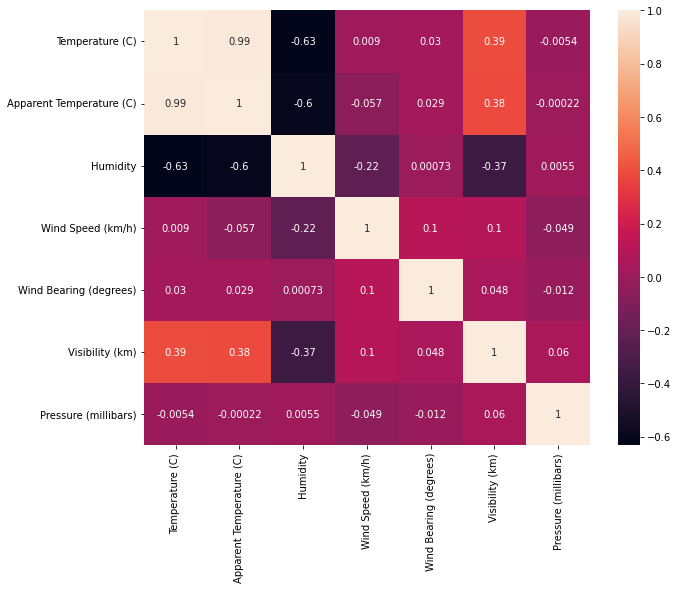

In [35]:
# Finding the correlation for all numerical variables.

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)